# Part 1: Load and Explore the data

In [11]:
import pandas as pd

print('Libs loaded!!')
# read the dataset from cvs file
df = pd.read_csv('dataset/StudentsPerformance.csv')

# display first five rows
df.head()


Libs loaded!!


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# Check dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
#check for missing values in each column
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
# get Stat summary 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Part 2: Preprocess the data  

In [16]:
# preprocessing the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
# converting gender, # converting gender and lunch to numeric for regression and lunch to numeric for regression
df['gender'] = df['gender'].map({'male': 0, 'female': 1})
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df['test preparation course'] = df['test preparation course'].map({'completed': 1, 'none': 0})

# display updated data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,1,0,72,72,74
1,1,group C,some college,1,1,69,90,88
2,1,group B,master's degree,1,0,90,95,93
3,0,group A,associate's degree,0,0,47,57,44
4,0,group C,some college,1,0,76,78,75


# Part 3: Univarant liner regression

In [19]:
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# using reading score to pridict maths score for single feature liner regression.

x = df['reading score'].values
y = df['math score'].values

#  number of samples
m = len(x)

In [29]:
# define cost function
def compute_cost(x,y,w,b):
    """
    Computes the Mean Squared Error (MSE) cost function J(w, b) for linear regression.

    Args:
        x (ndarray): Input features of shape (m,)
        y (ndarray): True target values of shape (m,)
        w (float): Weight parameter
        b (float): Bias term

    Returns:
        cost (float): The value of the cost function
    """
    m = x.shape[0]
    total_cost = 0.0
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        total_cost += (f_wb - y[i])**2
    total_cost /= (2*m)
    return total_cost


In [30]:
# compute gradient for w, b
def compute_gradient(x,y,w,b):
    """
    Computes the gradient of the cost function J(w, b) with respect to parameters w and b.

    Args:
        x (ndarray): Input features of shape (m,)
        y (ndarray): True target values of shape (m,)
        w (float): Weight parameter
        b (float): Bias term

    Returns:
        dj_dw (float): Gradient of cost with respect to w
        dj_db (float): Gradient of cost with respect to b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_dw += (f_wb - y[i])*x[i]
        dj_db += (f_wb - y[i])

    dj_dw /= m
    dj_db /= m
    return dj_dw,dj_db
    

In [25]:
def gradient_decent(x,y, w_in, b_in, alpha, num_iterations):
    """
    Performs batch gradient descent to learn the optimal parameters w and b.
    
    Args:
        x (ndarray): Input feature values of shape (m,)
        y (ndarray): Target values of shape (m,)
        w_in (float): Initial weight
        b_in (float): Initial bias
        alpha (float): Learning rate (step size)
        num_iters (int): Number of iterations to run gradient descent

    Returns:
        w (float): Learned weight after gradient descent
        b (float): Learned bias after gradient descent

    Process:
        - For each iteration:
            1. Compute the gradient (partial derivatives) of the cost function J with respect to w and b
            2. Update w and b using the gradients scaled by the learning rate
            3. Every 100 iterations, compute and print the current cost and parameters for tracking
    """
    w = w_in
    b = b_in
    J_history = []
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(x,y, w, b)

        # update params
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # save cost J at every 100 Iterations
        if i % 100 == 0:
            cost = compute_cost(x,y,w,b)
            J_history.append(cost)
            print(f"Iteration {i:4}: Cost {cost:.2f}, w = {w:.2f}, b = {b:.2f}")
    return w, b

In [31]:
# initial values of w,b, alpha(learning rate), intrations
w_init, b_init, alpha, iterations = 0, 0, 0.0001, 2000

# train the model 
w_final, b_final = gradient_decent(x,y,w_init, b_init, alpha, iterations)

print(f"\nFinal parameters: w = {w_final:.2f}, b = {b_final:.2f}")

Iteration    0: Cost 604.49, w = 0.48, b = 0.01
Iteration  100: Cost 39.23, w = 0.95, b = 0.02
Iteration  200: Cost 39.23, w = 0.95, b = 0.02
Iteration  300: Cost 39.22, w = 0.95, b = 0.02
Iteration  400: Cost 39.22, w = 0.95, b = 0.03
Iteration  500: Cost 39.22, w = 0.95, b = 0.03
Iteration  600: Cost 39.22, w = 0.95, b = 0.03
Iteration  700: Cost 39.22, w = 0.95, b = 0.04
Iteration  800: Cost 39.22, w = 0.95, b = 0.04
Iteration  900: Cost 39.22, w = 0.95, b = 0.04
Iteration 1000: Cost 39.22, w = 0.95, b = 0.04
Iteration 1100: Cost 39.22, w = 0.95, b = 0.05
Iteration 1200: Cost 39.22, w = 0.95, b = 0.05
Iteration 1300: Cost 39.21, w = 0.95, b = 0.05
Iteration 1400: Cost 39.21, w = 0.95, b = 0.06
Iteration 1500: Cost 39.21, w = 0.95, b = 0.06
Iteration 1600: Cost 39.21, w = 0.95, b = 0.06
Iteration 1700: Cost 39.21, w = 0.95, b = 0.07
Iteration 1800: Cost 39.21, w = 0.95, b = 0.07
Iteration 1900: Cost 39.21, w = 0.95, b = 0.07

Final parameters: w = 0.95, b = 0.08


# Part 4: Plot Prediction

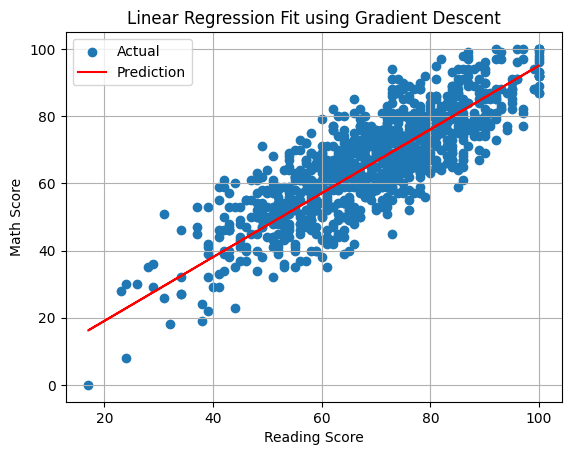

In [35]:
# plotting
plt.scatter(x,y, label= 'Actual')

# recalculation of y^ based on 
f_wb = np.dot(w_final,x) + b_final

plt.plot(x,f_wb, color='red', label='Prediction')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.title('Linear Regression Fit using Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Multiple linear regression

In [45]:
# getting the multiple features
x_features = ['reading score', 'writing score']
x_train = df.loc[:,x_features].values
y_train = df['math score'].values
# print(x_train)
# print(y_train)

[[72 74]
 [90 88]
 [95 93]
 ...
 [71 65]
 [78 77]
 [86 86]]


In [46]:
# Given the values of training set feature scaling is needed 
# if we do not normalise our features on with higher range 0-100 will dominate and slow down the break convergence.
mean = np.mean(x_train, axis=0)
sigma = np.std(x_train,axis=0)
x_train_norm = (x_train - mean)/ sigma

In [47]:
m = x_train_norm.shape[0]
X_b = np.hstack([np.ones((m, 1)), x_train_norm])

In [49]:
# Cost function
def compute_cost(X, y, w):
    """
    Compute the cost J(w) for linear regression.
    
    Parameters:
    X : (m, n+1) numpy array of input features
    y : (m,) numpy array of target values
    w : (n+1,) numpy array of weights
    
    Returns:
    J : float, the cost
    """
    m = X.shape[0]
    predictions = np.dot(X, w)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.dot(errors, errors)
    return cost

# Gradient function
def compute_gradient(X, y, w):
    """
    Compute gradient for linear regression cost function.
    
    Parameters:
    X : (m, n+1) input features
    y : (m,) target values
    w : (n+1,) weight vector
    
    Returns:
    grad : (n+1,) numpy array of gradients
    """
    m = X.shape[0]
    predictions = np.dot(X, w)
    errors = predictions - y
    gradient = (1 / m) * np.dot(X.T, errors)
    return gradient

# Gradient Descent
def gradient_descent(X, y, w, alpha, num_iters):
    """
    Performs gradient descent to learn w.
    
    Parameters:
    X : (m, n+1) feature matrix
    y : (m,) target values
    w : (n+1,) initial weights
    alpha : float, learning rate
    num_iters : int, number of iterations
    
    Returns:
    w : learned weights
    J_history : list of cost values
    """
    J_history = []
    for i in range(num_iters):
        grad = compute_gradient(X, y, w)
        w = w - alpha * grad
        J_history.append(compute_cost(X, y, w))
    return w, J_history


In [50]:
w_init = np.zeros(X_b.shape[1])
alpha = 0.01
num_iters = 1000

w_final, J_history = gradient_descent(X_b, y_train, w_init, alpha, num_iters)
